In [1]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [4]:

df = pd.read_csv("/content/heart.csv")

In [20]:
# IT24102626 Class balanced check (Apply SMORT)
# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split before applying SMOTE (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {1: 421, 0: 399}
After SMOTE: {0: 421, 1: 421}


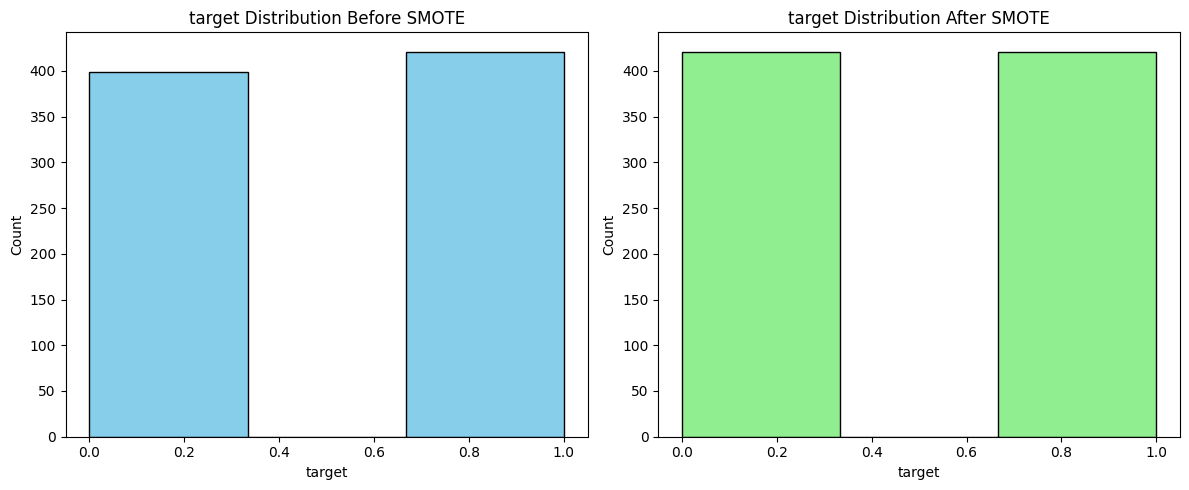

In [21]:
# Plot histogram of class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axes[0].hist(y_train, bins=3, color='skyblue', edgecolor='black')
axes[0].set_title("target Distribution Before SMOTE")
axes[0].set_xlabel("target")
axes[0].set_ylabel("Count")

# After SMOTE
axes[1].hist(y_train_res, bins=3, color='lightgreen', edgecolor='black')
axes[1].set_title("target Distribution After SMOTE")
axes[1].set_xlabel("target")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Scale numeric features AFTER SMOTE
scaler = StandardScaler()
X_train_res[numeric_cols] = scaler.fit_transform(X_train_res[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])  # use same scaler

# Show scaled training data (first 5 rows of numeric columns)
pd.DataFrame(X_train_res, columns=X_train.columns)[numeric_cols].head()

,age,trestbps,chol,thalach,oldpeak
0,0.805822,0.302120,0.893807,-1.914677,0.679086
1,0.143222,3.744259,0.776785,-0.715782,2.455167
2,0.253656,-0.253064,-0.373927,0.039077,-0.589543
3,0.253656,0.968340,-2.382798,1.060358,-0.758693
4,-0.298511,0.191083,-1.017546,0.882744,-0.843268


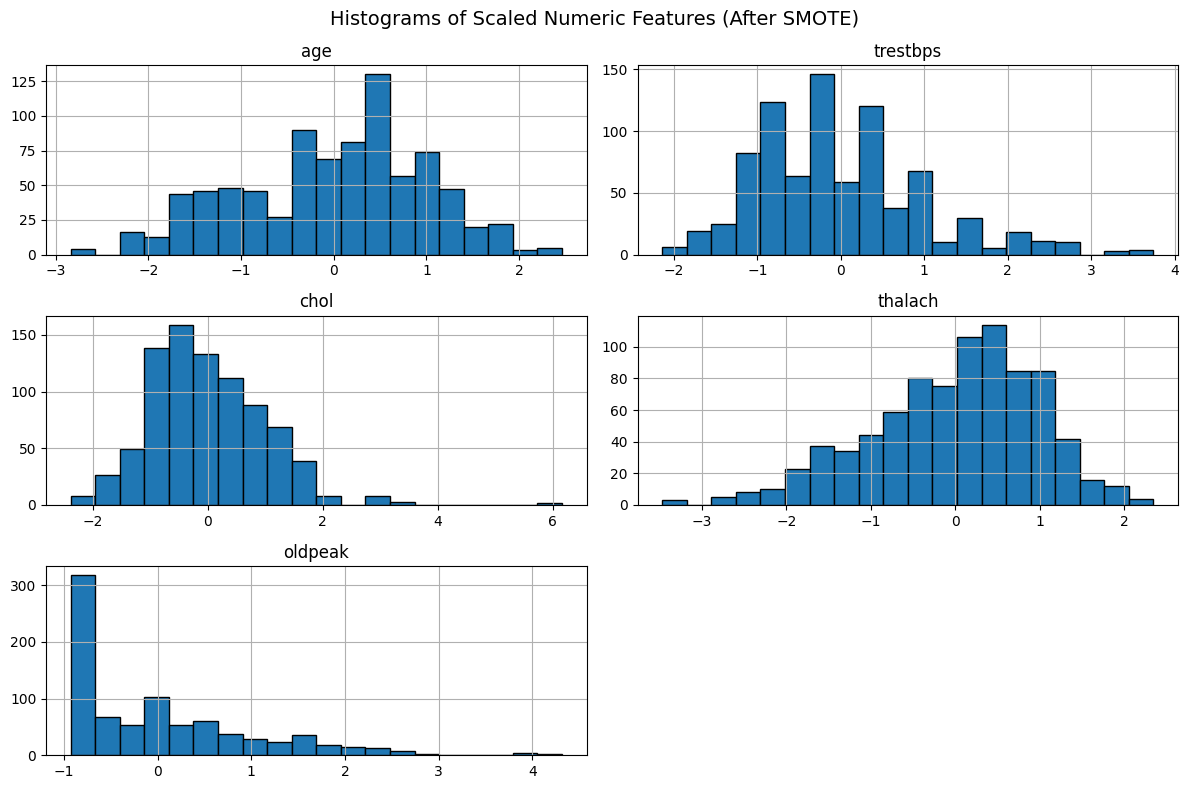

In [24]:
X_train_res_scaled = pd.DataFrame(X_train_res, columns=X_train.columns)

X_train_res_scaled[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Scaled Numeric Features (After SMOTE)", fontsize=14)
plt.tight_layout()
plt.show()


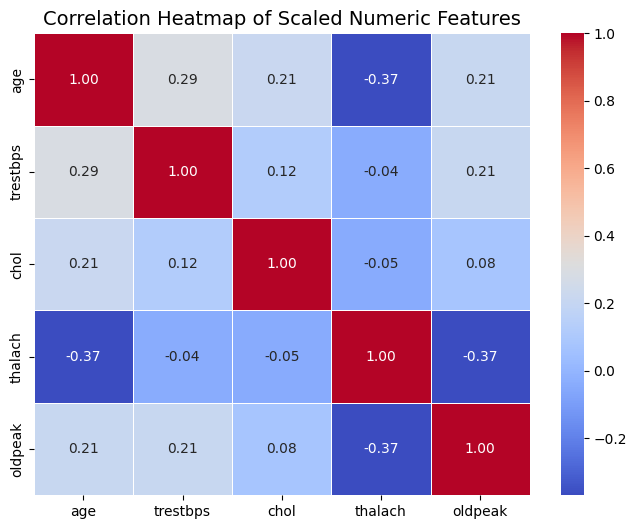

In [25]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
corr_matrix = X_train_res_scaled[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Scaled Numeric Features", fontsize=14)
plt.show()

# **IT24102690 (Dimension Reduction)**

In [26]:
#IT24102690 (Dimension Reduction)
# Define the features to use for PCA (using the selected features from SelectKBest as an example)

#  Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

#  Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Apply PCA (keep 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



# Explained variance (to decide how many components to keep)
pca_full = PCA().fit(X_scaled)
print("Explained variance ratio:", pca_full.explained_variance_ratio_)
print("Cumulative explained variance:", pca_full.explained_variance_ratio_.cumsum())

Explained variance ratio: [0.21369912 0.11971959 0.09238384 0.08994039 0.07685925 0.07479569
 0.06741785 0.05907578 0.05584142 0.04849683 0.04017354 0.0332042
 0.02839249]
Cumulative explained variance: [0.21369912 0.33341871 0.42580256 0.51574295 0.5926022  0.66739789
 0.73481574 0.79389152 0.84973294 0.89822978 0.93840331 0.97160751
 1.        ]


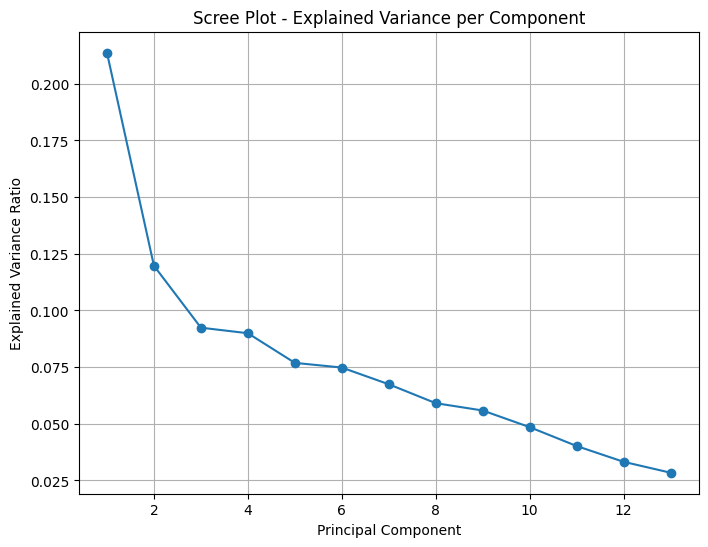

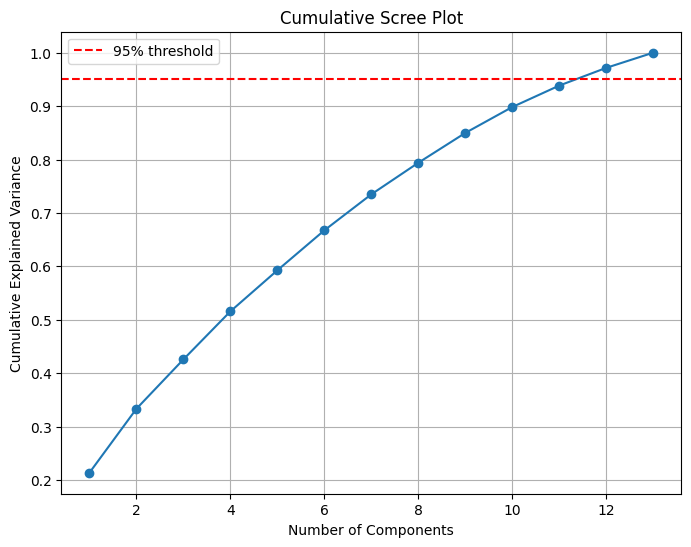

In [27]:
# Explained variance (per component)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),
         pca_full.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot - Explained Variance per Component")
plt.grid(True)
plt.show()

# Cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),
         pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Scree Plot")
plt.legend()
plt.grid(True)
plt.show()